In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [64]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [65]:

df_federacio = pd.read_csv("../project_2/df_federacio.csv")
df_federacio

,ROUND,RESULTS,DATE,W/D/L
0,Jornada 1,SD ESPANYOL B 0 - 5 C.E.DMS A,2022/10/15,L
1,Jornada 2,FUNDACIÓ FUTBOL BADALONA A 4 - 8 SD ESPANYOL B,2022/10/22,W
2,Jornada 3,SD ESPANYOL B 1 - 1 AELIS-SAGE PARTNER EIXAMPLE B,2022/10/29,D
3,Jornada 4,"FUTSAL CLASSIC BARCELONA, CLUB ESPORTIU A 3 -...",2022/11/05,W
4,Jornada 5,SD ESPANYOL B 7 - 3 SANT ANDREU SAGRERA - AESA A,2022/11/12,W
5,Jornada 6,PLAY FUTSAL A 6 - 4 SD ESPANYOL B,2022/11/19,L
6,Jornada 7,SD ESPANYOL B 5 - 6 ALZINA ASSOC. ESP. A,2022/11/26,L
7,Jornada 8,MONTSENY CECD A 2 - 5 SD ESPANYOL B,2022/12/03,W
8,Jornada 9,SD ESPANYOL B 0 - 3 MAGIC SANTS FUTSAL B,2022/12/17,L
9,Jornada 10,F.S BOSCO ROCAFORT A 7 - 4 SD ESPANYOL B,2023/01/14,L


In [90]:
df_garmin = pd.read_csv("../project_2/df_garmin.csv")
df_garmin


,YEAR,MONTH/DAY,NORMAL HEART RATE,DATE,WEEKDAY
0,2022,01/22,50,2022/01/22,Saturday
1,2022,01/23,47,2022/01/23,Sunday
2,2022,01/24,44,2022/01/24,Monday
3,2022,01/25,47,2022/01/25,Tuesday
4,2022,01/26,45,2022/01/26,Wednesday
...,...,...,...,...,...
451,2023,10/23,55,2023/10/23,Monday
452,2023,10/24,50,2023/10/24,Tuesday
453,2023,10/25,44,2023/10/25,Wednesday
454,2023,10/26,40,2023/10/26,Thursday


In [76]:
merged_df = df_federacio.merge(df_garmin[['DATE', 'NORMAL HEART RATE']], on='DATE', how='left')

# Rename the 'FREQUENCIA CARDIACA EN REPOSO' column from df_other
merged_df = merged_df.rename(columns={'NORMAL HEART RATE': 'MATCH DAY HEART RATE'})

# Print the updated DataFrame
merged_df
merged_df.columns

Index(['ROUND', 'RESULTS', 'DATE', 'W/D/L', 'MATCH DAY HEART RATE'], dtype='object')

In [68]:

column_name = "Values"
average = merged_df["MATCH DAY HEART RATE"].mean()

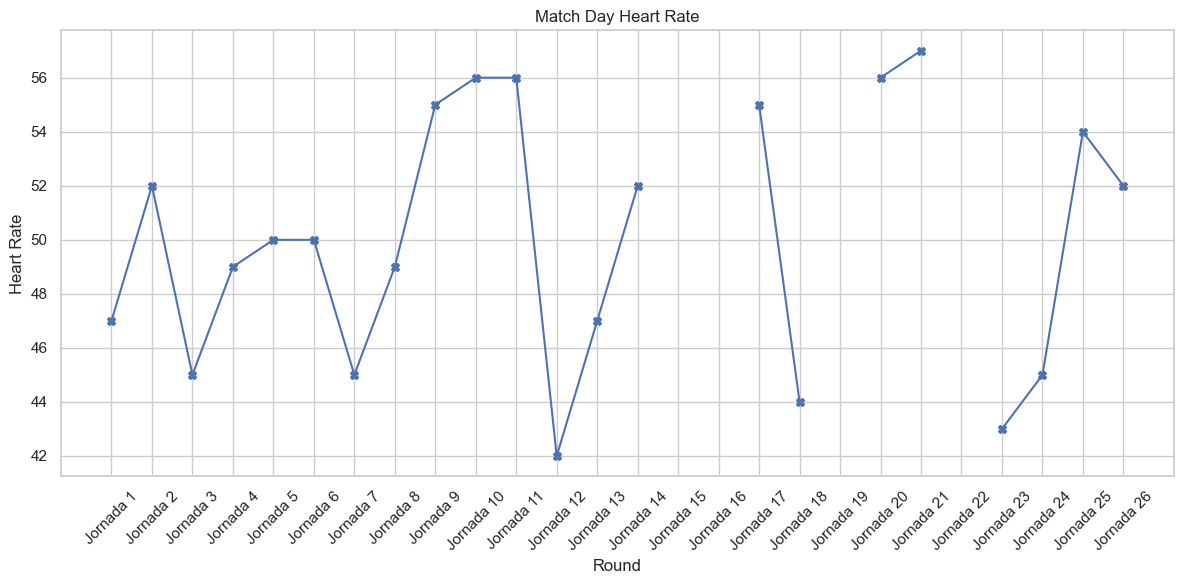

In [112]:
# representation of the average match day heart rate

plt.plot(merged_df['ROUND'], merged_df['MATCH DAY HEART RATE'], marker='X')

# Add labels and title
plt.xlabel("Round")
plt.ylabel("Heart Rate")
plt.title("Match Day Heart Rate")

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



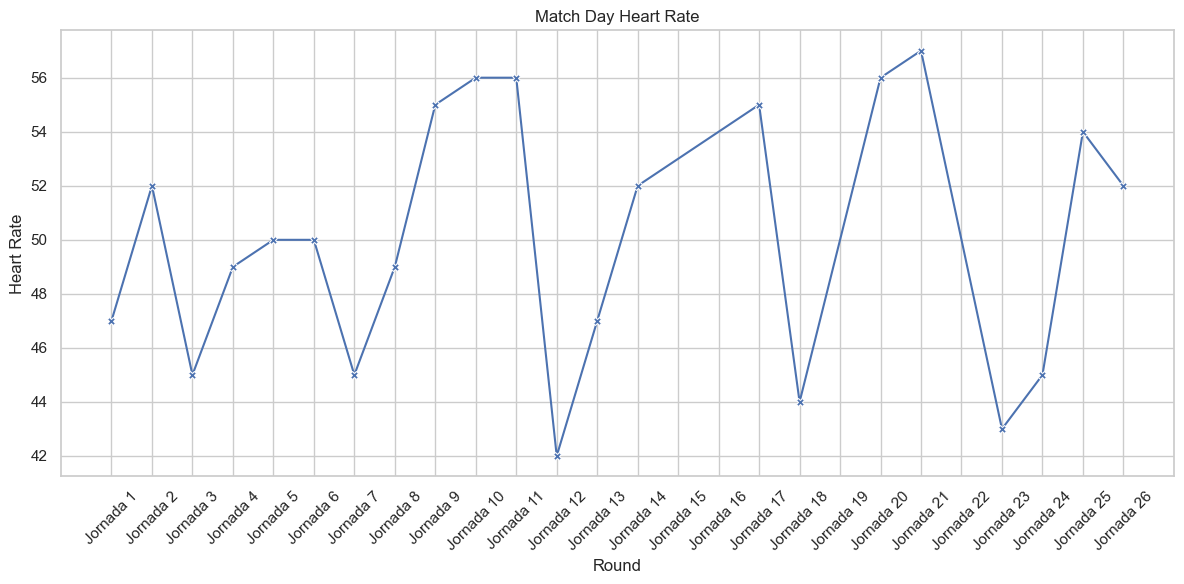

In [111]:
sns.lineplot(data=merged_df, x="ROUND", y="MATCH DAY HEART RATE", marker='X');
# Add labels and title
plt.xlabel("Round")
plt.ylabel("Heart Rate")
plt.title("Match Day Heart Rate")

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
# round plot with % of victories, draw and loses
stats = merged_df["W/D/L"].value_counts()
stats

W/D/L
W    12
L    11
D     3
Name: count, dtype: int64

Text(0, 0.5, 'WIN: 12 / DRAW: 3 / LOSES: 11')

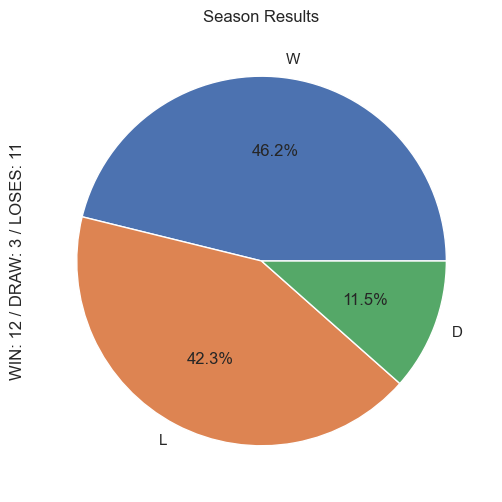

In [89]:

stats.plot.pie(autopct="%.1f%%");
plt.title("Season Results")
plt.ylabel('WIN: 12 / DRAW: 3 / LOSES: 11')


Text(0.5, 0, '')

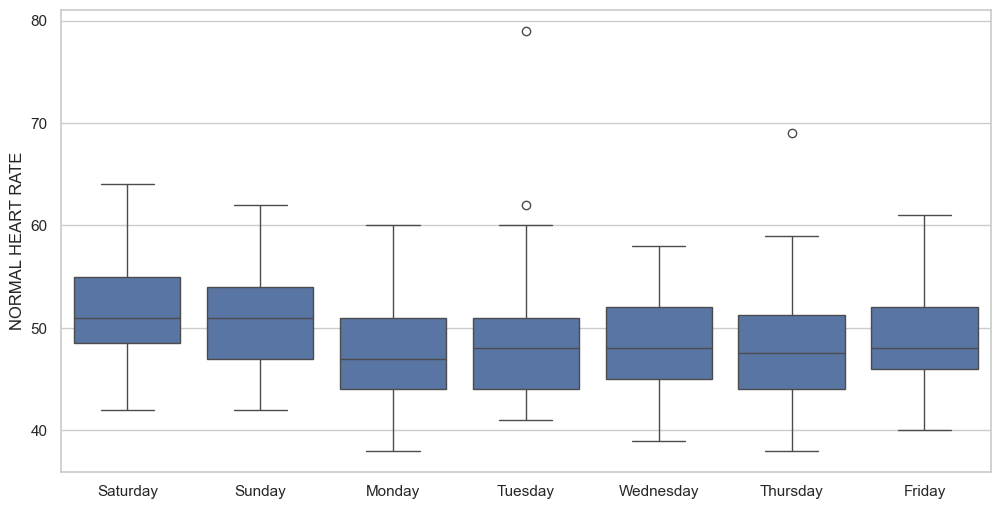

In [92]:
# mitja per dies de la setmana
sns.boxplot(x="WEEKDAY", y="NORMAL HEART RATE", data=df_garmin);
plt.xlabel('')

Text(0, 0.5, '')

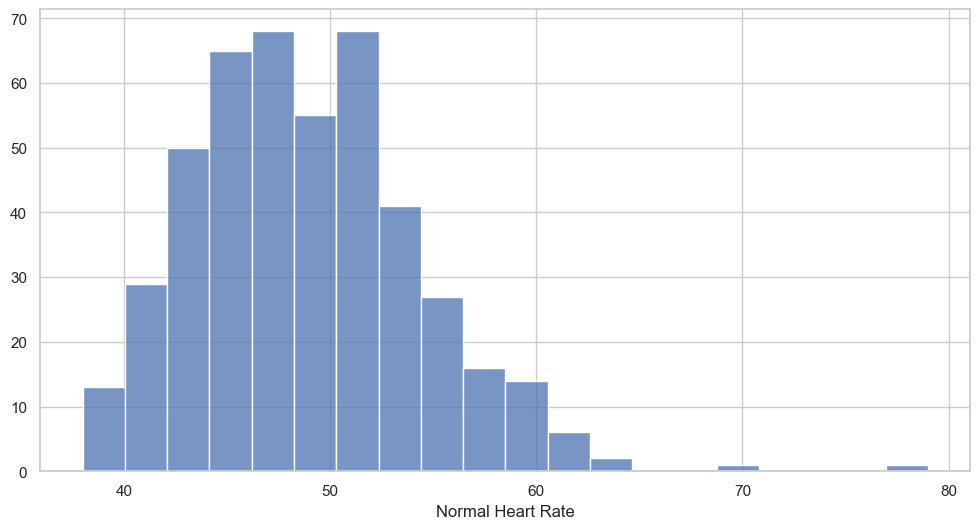

In [102]:
# histograma distribucio heart rate (seaborn)
sns.histplot(x=df_garmin["NORMAL HEART RATE"], bins=20);
plt.xlabel('Normal Heart Rate')
plt.ylabel('')

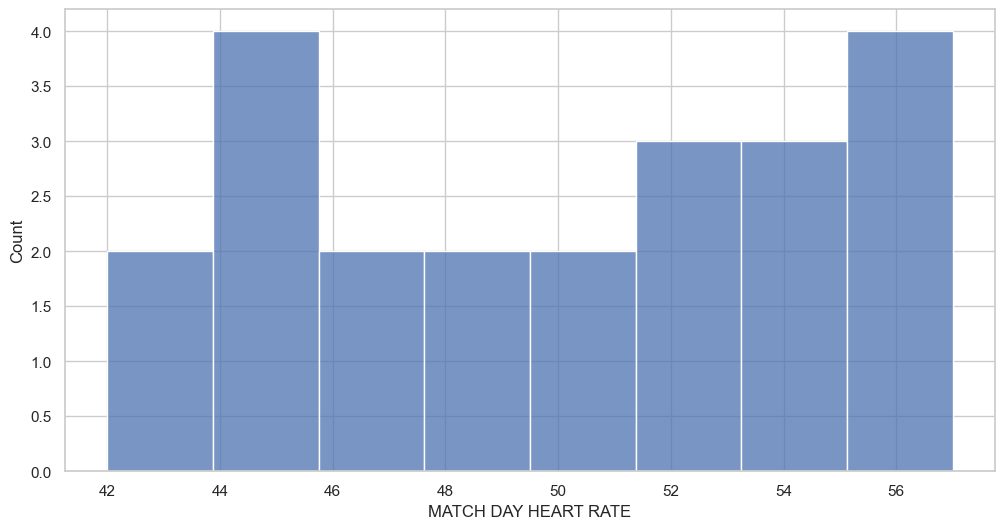

In [103]:
#histograma distribucio heart rate match day

sns.histplot(x=merged_df["MATCH DAY HEART RATE"], bins=8);


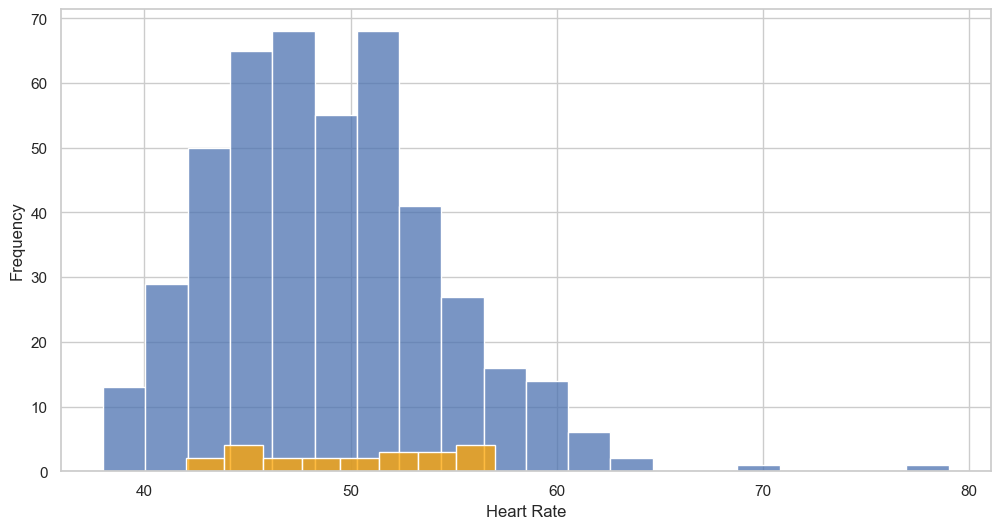

In [107]:
# joined histplots --> tiene sentido?


import seaborn as sns
import matplotlib.pyplot as plt

# Create a single figure and axis to host the histplots
fig, ax = plt.subplots()

# Plot the first histplot on the specified axis
sns.histplot(x=df_garmin["NORMAL HEART RATE"], bins=20, ax=ax)

# Plot the second histplot on the same axis
sns.histplot(x=merged_df["MATCH DAY HEART RATE"], bins=8, color='orange', ax=ax)

# Add labels for clarity
ax.set_xlabel("Heart Rate")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()


In [72]:

# mitja per hr despres de derrota/ victoria/ empat


In [73]:
# sns.boxplot(x="Age", data=titanic, y="Pclass");

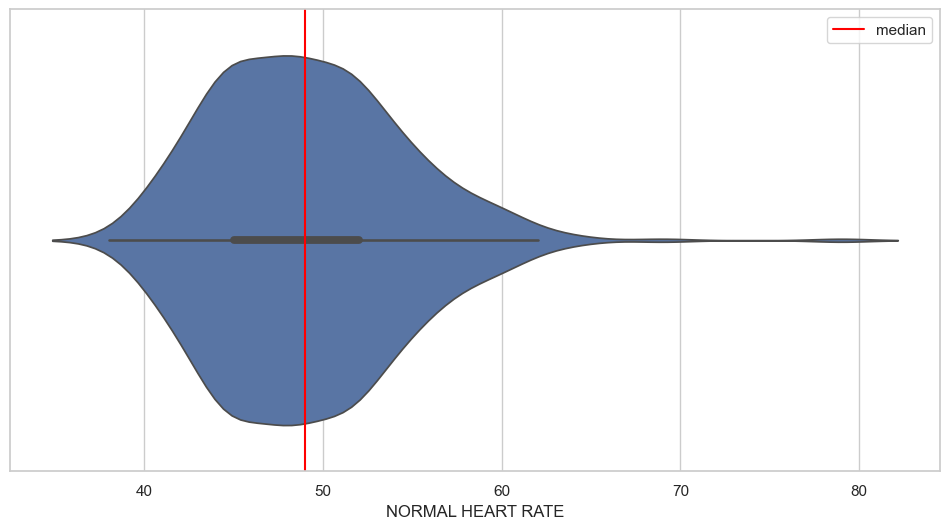

In [81]:
# violin normal heart rate

violin = sns.violinplot(x=df_garmin['NORMAL HEART RATE'])
violin.axvline(x=df_garmin['NORMAL HEART RATE'].median(), c="red", label="median")
plt.legend() 

#juntar-ho amb match heart rate

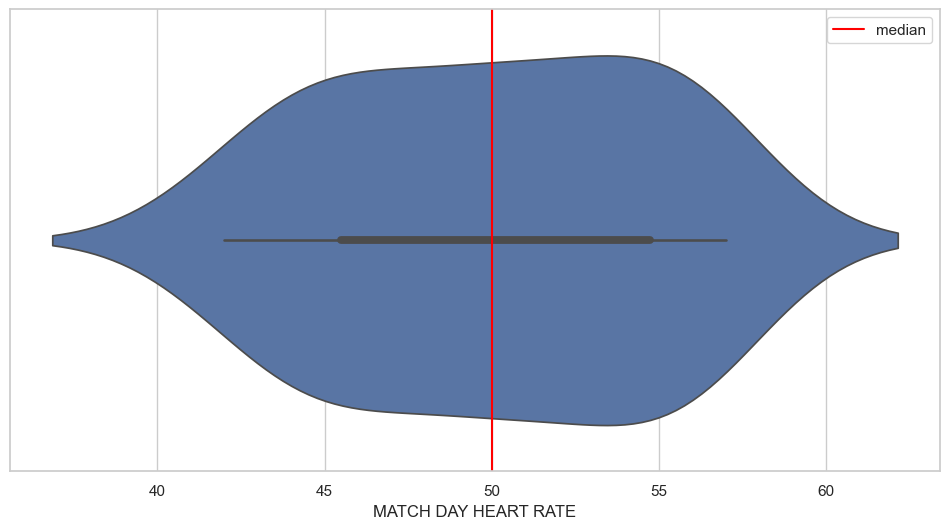

In [104]:
# violin match heart rate
violin = sns.violinplot(x=merged_df['MATCH DAY HEART RATE'])
violin.axvline(x=merged_df['MATCH DAY HEART RATE'].median(), c="red", label="median")
plt.legend()

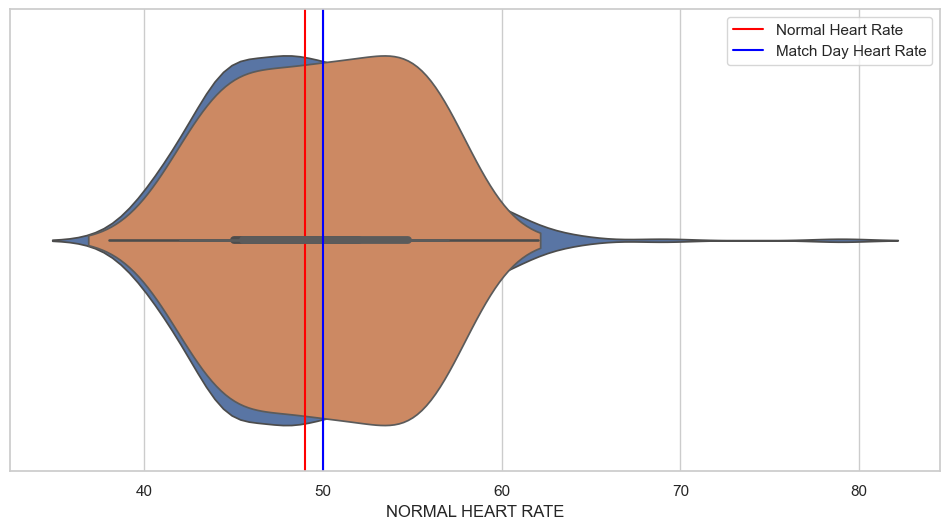

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a single figure and axis to host the violin plots
fig, ax = plt.subplots()

# Plot the first violin plot on the specified axis
sns.violinplot(x=df_garmin['NORMAL HEART RATE'], ax=ax)
ax.axvline(x=df_garmin['NORMAL HEART RATE'].median(), c="red", label="Normal Heart Rate")

# Plot the second violin plot on the same axis
sns.violinplot(x=merged_df['MATCH DAY HEART RATE'], ax=ax)
ax.axvline(x=merged_df['MATCH DAY HEART RATE'].median(), c="blue", label="Match Day Heart Rate")

# Add legends
plt.legend()

# Show the plot
plt.show()


